<a href="https://colab.research.google.com/github/wallik2/University-stuff/blob/main/Intro_Data_Sci/Week_10_Feature_Selection%2C_Dimensional_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<fieldset>

### The advantage of Feature selection
○ Reduces Overfitting (a model that models the training data too well). <br>
○ Improves Accuracy <br>
○ Reduces Training Time:





---



# Feature selection techniques

( We better see these as step by step! )

1. Low Variance Feature Selection
2. Univariate Feature Selection
3. Recursive Feature Elimination
4. Principal Component Analysis

<fieldset>

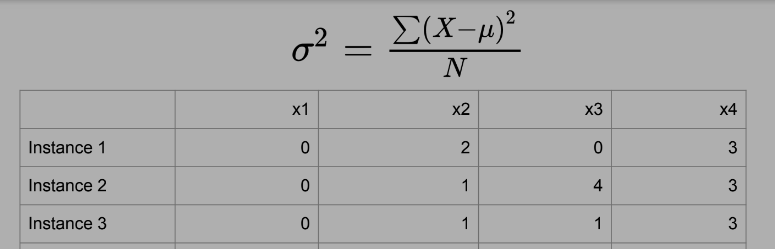

### 1. Low Variance Feature Selection

- We use this step to filter the very low variance features out (Criteria: threshold)

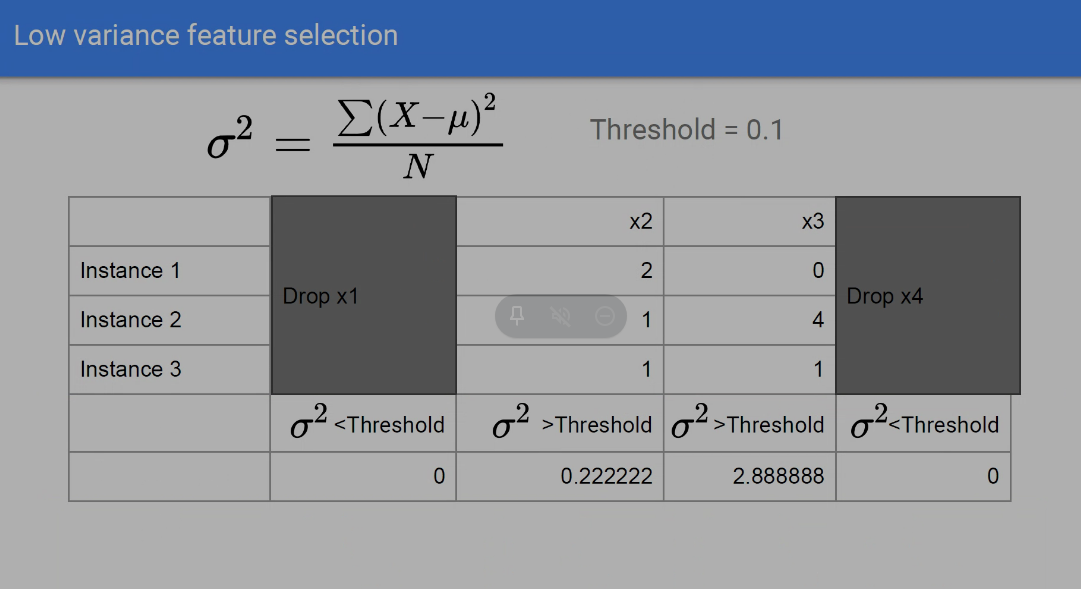

If the feature has the variance lower than threshold then we reject it!

In [ ]:
import numpy as np

from sklearn.feature_selection import VarianceThreshold

In [ ]:
X = np.array([[0, 2, 0, 3], 
              [0, 1, 4, 3],[0, 1, 1, 3]])

In [ ]:
sel = VarianceThreshold(threshold=0.1)
new_X = sel.fit_transform(X)

In [ ]:
print(X)

# new_X -> Filtered feature
print(new_X)

# Print the variance of each new_X
print(sel.variances_)

[[0 2 0 3]
 [0 1 4 3]
 [0 1 1 3]]
[[2 0]
 [1 4]
 [1 1]]
[0.         0.22222222 2.88888889 0.        ]


### 2. Univariate Feature Selection

- (optional) Chi2 is the criteria to get the score ; For a Chi-square test, a p-value that is less than or equal to your significance level indicates there is sufficient evidence to conclude that the observed distribution is not the same as the expected distribution.

- In fact, we can use anything as the criteria such as variances


2.1) Select K-best with chi2

In [ ]:
import numpy as np, pandas as pd

from sklearn.feature_selection import SelectKBest, chi2

In [ ]:

X = np.array([[0, 2, 0, 3],
              [0, 1, 4, 3],[0, 1, 1, 3]])

y = np.array([0, 1, 1])
X = pd.DataFrame(X)
y = pd.DataFrame(y)

sel = SelectKBest(chi2, k=2)
new_X = pd.DataFrame(sel.fit_transform(X, y))


In [ ]:
# We use criteria as chi2, and we want just 2 features that has the greatest k score

# Fact: We can make formula by yourself, and use instead of Chi2, to define the scores for each features

sel = SelectKBest(chi2, k=2)

In [ ]:
new_X = pd.DataFrame(sel.fit_transform(X, y))

print(X)
print(new_X)
print(sel.scores_)

   0  1  2  3
0  0  2  0  3
1  0  1  4  3
2  0  1  1  3
   0  1
0  2  0
1  1  4
2  1  1
[nan 0.5 2.5 0. ]


2.2. SelectPercentile with Chi2

In [ ]:
import numpy as np ,pandas as pd

from sklearn.feature_selection import SelectPercentile, chi2

In [ ]:
X = np.array([[0, 2, 0, 3],[0, 1, 4, 3],[0, 1, 1, 3]]) ;X = pd.DataFrame(X)
y = np.array([0, 1, 1]) ;y = pd.DataFrame(y)

In [ ]:
# Using k-best may eliminate the useful feeture, even it doesn't win the first k place..., so using Percentile may be more reasonable

sel = SelectPercentile(chi2,percentile=25)
new_X = pd.DataFrame(sel.fit_transform(X, y))

In [ ]:
print(X,'\n------')

print(new_X,'\n------')
print(sel.scores_)

   0  1  2  3
0  0  2  0  3
1  0  1  4  3
2  0  1  1  3 
------
   0
0  0
1  4
2  1 
------
[nan 0.5 2.5 0. ]




---



### 3. Recursive Feature Elimination

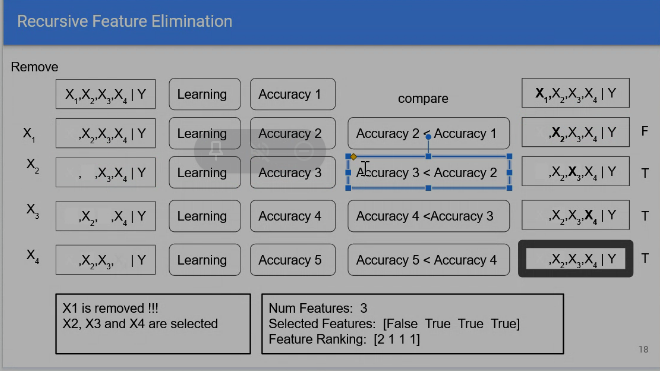

- Compare the accuracy between removed feature, and full feature accuracy
- Use a lot of time, but it's valuable since you obtain the best features

In [ ]:
import numpy as np, pandas as pd

from sklearn.feature_selection import RFE  #Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression

In [ ]:
X = np.array([[0, 2, 0, 3],[0, 1, 4, 3],[0, 1, 1, 3]])

y = np.array([0, 1, 1])

X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [ ]:
# Apply Logistic Reg. to just a single feature, and then multiple features respectively.

model = LogisticRegression()
rfe = RFE(model, 3)
new_X = pd.DataFrame(rfe.fit_transform(X, y))
print(X,'\n------')
print(new_X,'\n------')
print("Num Features: ", rfe.n_features_)
print("Selected Features: ", rfe.support_)
print("Feature Ranking: ",rfe.ranking_)

   0  1  2  3
0  0  2  0  3
1  0  1  4  3
2  0  1  1  3 
------
   0  1  2
0  2  0  3
1  1  4  3
2  1  1  3 
------
Num Features:  3
Selected Features:  [False  True  True  True]
Feature Ranking:  [2 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




---



### 4. Principal Component Analysis (PCA)

- Deriving the newdataset with the given dimension 

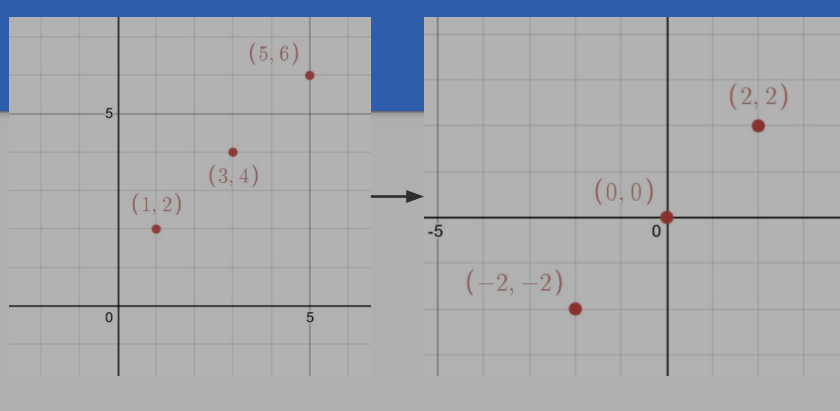

https://www.youtube.com/watch?v=FgakZw6K1QQ

Version 1: From Sklearn

In [ ]:
import numpy as np, pandas as pd
from sklearn.decomposition import PCA

In [ ]:
X = np.array([[1, 2], [3, 4], [5, 6]])
X = pd.DataFrame(X)

In [ ]:
# Convert 3d to 2d

pca = PCA(n_components=2)

new_X = pd.DataFrame(pca.fit_transform(X))

In [ ]:

print(X,'\n------')


print(new_X,'\n------')


print(pca.components_,'\n------')


print(pca.explained_variance_)

   0  1
0  1  2
1  3  4
2  5  6 
------
          0    1
0 -2.828427  0.0
1  0.000000  0.0
2  2.828427  0.0 
------
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]] 
------
[8. 0.]


Version 2: Manually

In [ ]:
from numpy import array, mean, cov
from numpy.linalg import eig

In [ ]:
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)

[3. 4.]


In [ ]:
# center columns by subtracting column means
C = A - M

In [ ]:
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)

[[4. 4.]
 [4. 4.]]


In [ ]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]


In [ ]:
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]




---



# Application 1: Iris Data

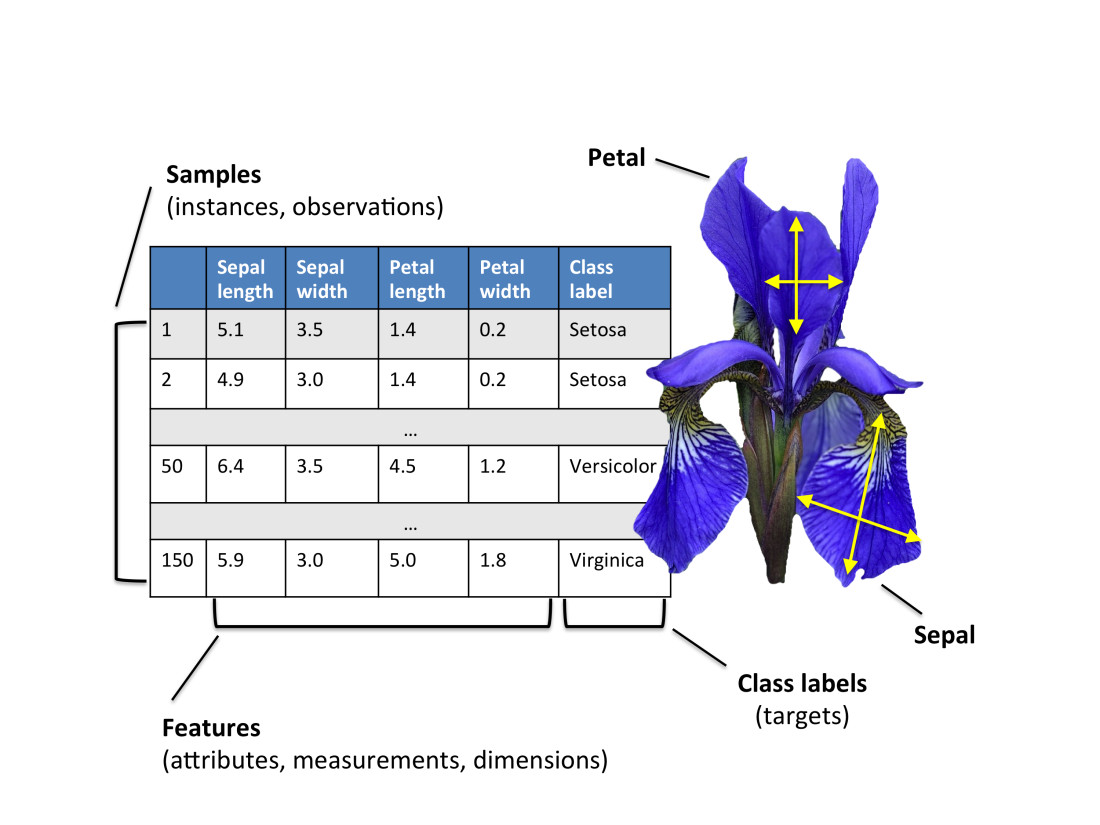

### 1. using Low variance feature selection

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data /iris.data",header = None)

In [ ]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = data[[0,1,2,3]]
sel = VarianceThreshold(threshold=0.2)
new_X = pd.DataFrame(sel.fit_transform(X))

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
     0    1    2
0  5.1  1.4  0.2
1  4.9  1.4  0.2
2  4.7  1.3  0.2
3  4.6  1.5  0.2
4  5.0  1.4  0.2
[0.68112222 0.18675067 3.09242489 0.57853156]


In [ ]:
print(X.head(5),'\n')
print(new_X.head(5),'\n')
print(sel.variances_)

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2 

     0    1    2
0  5.1  1.4  0.2
1  4.9  1.4  0.2
2  4.7  1.3  0.2
3  4.6  1.5  0.2
4  5.0  1.4  0.2 

[0.68112222 0.18675067 3.09242489 0.57853156]




---



### 2. using Univariate feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data /iris.data",header = None)

data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = data[[0,1,2,3]]
y = data[4]

In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

sel = SelectKBest(chi2, k=3)
new_X = pd.DataFrame(sel.fit_transform(X, y))

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
     0    1    2
0  5.1  1.4  0.2
1  4.9  1.4  0.2
2  4.7  1.3  0.2
3  4.6  1.5  0.2
4  5.0  1.4  0.2
[ 10.81782088   3.59449902 116.16984746  67.24482759]


In [ ]:
print(data.head(5),'\n')
print(X.head(5),'\n')
print(new_X.head(5),'\n')
print(sel.scores_)

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa 

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2 

     0    1    2
0  5.1  1.4  0.2
1  4.9  1.4  0.2
2  4.7  1.3  0.2
3  4.6  1.5  0.2
4  5.0  1.4  0.2 

[ 10.81782088   3.59449902 116.16984746  67.24482759]




---



### 3. using Recursive feature elimimation

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data /iris.data",header = None)

data.head()

In [ ]:
X = data[[0,1,2,3]]
y = data[4]


In [ ]:
# Encoding the label
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

# 
model = LogisticRegression()
rfe = RFE(model, 3)
new_X = pd.DataFrame(rfe.fit_transform(X, y))

In [ ]:
print(X.head(5))
print(new_X.head(5))
print("Num Features: ", rfe.n_features_)
print("Selected Features: ", rfe.support_)
print("Feature Ranking: ",rfe.ranking_)



---



### 4. using PCA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data /iris.data",header = None)

data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
pca = PCA(n_components=2)
new_X = pd.DataFrame(pca.fit_transform(X))

In [ ]:
print(X.head(5),'\n')
print(new_X.head(5))

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2 

          0         1
0 -2.684207  0.326607
1 -2.715391 -0.169557
2 -2.889820 -0.137346
3 -2.746437 -0.311124
4 -2.728593  0.333925
